# Data Understanding/ Preperation

## externe Bibliotheken installieren

In [2]:
# %pip install missingno
# %pip install pandas_profiling
# %pip install MarkupSafe==2.0.1

## Bibliotheken, Funktionen und Klassen importieren

In [76]:
# Bibliotheken
import base64
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Feature Selection
from sklearn.feature_selection import RFE, RFECV
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

# Feature Scaling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Splitting Data
from sklearn.model_selection import StratifiedKFold

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.multiclass import OneVsOneClassifier
# from sklearn.multiclass import OneVsRestClassifier


# Evaluation
from sklearn.metrics import f1_score, classification_report

ModuleNotFoundError: No module named 'xgboost'

## Datensatz aus OneDrive einlesen
Der Datensatz wird aus OneDrive eingelesen. 

*Quelle: https://towardsdatascience.com/onedrive-as-data-storage-for-python-project-2ff8d2d3a0aa*

In [4]:
def create_onedrive_directdownload (onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

df = pd.read_csv(create_onedrive_directdownload("https://1drv.ms/u/s!Ai0ffDmeM0ho1FNrZ1ho6d2NZqUV?e=MDLRDb"),sep=",", engine="python")
# df_large = pd.read_csv(create_onedrive_directdownload("https://1drv.ms/u/s!Ai0ffDmeM0ho1RKf3ExkvP3fLF0q?e=N106Gb"),sep=",", engine="python")

In [5]:
# print(df_large.shape)
# print(df_large.columns)

## Features

In [6]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

**Diabetes_012**: nominalskaliert; 0 = gesund, 1 = prediabetes, 2 = diabetes

**HighBP**: nominalskaliert; 0 = kein hoher Blutdruck, 1 = hoher Blutdruck

**HighCol**: nominalskaliert; 0 = kein hoher Cholesterinspiegel, 1 = hoher Cholesterinspiegel

**CholCheck**: nominalskaliert; 0 = kein Cholesterincheck in den letzten 5 Jahren, 1 = Cholesterincheck in den letzten 5 Jahren

**BMI**: intervallskaliert

**Smoker**: nominalskaliert; 0 = nicht mehr als 100 Zigaretten im Leben geraucht, 1 = mehr als 100 Zigaretten im Leben geraucht

**Stroke**: nominalskaliert; 0 = noch keinen Schlaganfall gehabt, 1 = Schlaganfall gehabt 

**HeartDieseaseorAttack**: nominalskaliert; 0 = keine Herzkrankheit oder Herzinfarkt, 1 = Herzkrankheit oder Herzinfarkt

**PhysActivity**: intervallskaliert; Anzahl der Tage in den letzten 30 Tagen, an denen man körperlich aktiv war

**Fruits**: nominalskaliert; 0 = isst weniger als eine Frucht pro Tag, 1 = isst eine oder mehr Früchte pro Tag

**Veggies**: nominalskaliert; 0 = isst weniger als ein Gemüse pro Tag, 1 = isst eine oder mehr Gemüse pro Tag

**HvyAlcoholConsump**: nominalskaliert; 0 = weniger als 14 Drinks pro Woche, 1 = mehr als 14 Drinks pro Woche

**AnyHealthCare**: nominalskaliert; 0 = keine Krankenversicherung, 1 = Krankenversicherung (bezogen auf USA)

**NoDocbcCost**: nominalskaliert; 0 = konnte in den letzten 12 Monaten immer zum Doktor gehen, 1 = in den letzten 12 Monaten 
Doktor gebraucht aber nicht leisten können (bezogen auf USA)

**GenHlth**: ordinalskaliert; genereller Gesundheitsstatus: 1 = exzellent, 2 = sehr gut, 3 = gut, 4 = in Ordnung, 5 = schlecht

**MenHlth**: verhältnisskaliert; Anzahl der Tage in den letzten 30 Tagen, an denen es einem mental nicht gut ging (Stress, Depression, emotionale Probleme) 

**PhysHlth**: verhältnisskaliert; Anzahl der Tage in den letzten 30 Tagen, an denen es einem körperlich nicht gut ging (körperliche Krankheit, Verletzung)

**DiffWalk**: nominalskaliert; 0 = keine Schwierigkeiten beim Laufen, 1 = Schwierigkeiten beim Laufen

**Sex**: nominalskaliert; 0 = weiblich, 1 = männlich

**Age**: ordinalskaliert; 1 = 18-24 Jahre alt, 2 = 25-29 Jahre alt, 3 = 30 bis 34 Jahre alt, 4 = 35 - 39 Jahre alt, 5 = 40 bis 44 Jahre alt, 6  = 45 - 49 Jahre alt, 7 = 50 - 54 Jahre alt, 8 = 55 - 59 Jahre alt, 9 = 60 - 64 Jahre alt, 10 = 65 - 69 Jahre alt, 11 = 70 - 74 Jahre alt, 12 = 75 - 79 Jahre alt, 13 = 80 oder älter

**Education**: ordinalskaliert; 1 = Kindergarten, 2 = Grundschule (Elementary School, Grade 1 through 8), 3 = Some High School  (Grade 9 through 11), 4 = High School Degree (Grade 12 or GED), 5 = College 1 year to 3 years (Some college or technical school), 6 = College 4 Years or more (College graduate)

**Income**: ordinalskaliert; 1 = < 10000 USD Einkommen, 2 = 10000 - 15000 USD , 3 = 15000 - 20000 USD, 4 = 20000 - 25000 USD, 5 = 25000 - 35000 USD, 6 = 35000 - 50000 USD, 7 = 50000 - 75000 USD, 8 = 75000+ USD

## Variablen umbenennen

In [7]:
df.rename(columns = {'Diabetes_012': 'Diabetes_Type', 'Sex': 'Sex_male'}, inplace = True)

##  Anzeige der ersten Zeilen

In [8]:
# pd.set_option('display.max_columns', None)
# df.head()

## Anzeige der letzten Zeilen

In [9]:
# df.tail()

## Datensatz balanced oder imbalanced? 

In [10]:
Diabetes_valuecount = df['Diabetes_Type'].value_counts()
Diabetes_valuecount

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_Type, dtype: int64

### Visualisierung mit einem Kreisdiagramm

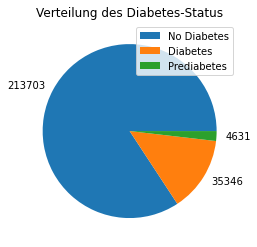

In [11]:
%matplotlib inline
fig = plt.figure()
labels = ['No Diabetes', 'Diabetes', 'Prediabetes']
plt.pie(Diabetes_valuecount, labels = Diabetes_valuecount)
plt.legend(labels)
plt.title('Verteilung des Diabetes-Status')
plt.show()

### Ergebnis
Der Datensatz ist **unausgewogen**. Das bedeutet, dass eine Klasse des Datensatzes gegenüber den anderen deutlich über-/unterrepräsentiert ist.

213703 Personen haben kein Diabetes, 4631 Personen haben Pre-Diabetes, und 35346 Personen haben Diabetes.

## Größe des Datensatzes

In [12]:
print(f'Der Datensatz hat {df.shape[0]} Zeilen und {df.shape[1]} Spalten.')

Der Datensatz hat 253680 Zeilen und 22 Spalten.


## Fehlende Werte

In [13]:
missing_values_count = np.sum(np.sum(df.isnull()))
print('Der Datensatz enthält', missing_values_count, 'fehlende Werte.')

Der Datensatz enthält 0 fehlende Werte.


### Darstellung mit missingno-matrix

In [14]:
#%matplotlib inline
#msno.matrix(df)

### Darstellung mit missingno-bar

In [15]:
#%matplotlib inline
#msno.bar(df)

### Ergebnis
Der Datensatz weist keine fehlenden Werte auf.

## Anzahl der einzigartigen Werte pro Feature

In [16]:
#df.nunique()

## Info über den Datensatz

In [17]:
#df.info()

## Deskriptive Statistik

In [18]:
#df.describe()

## Data Cleaning

### Duplikate entfernen

In [19]:
# Anzahl der Zeilen im unbereinigten Datensatz
df.shape[0]

253680

In [20]:
duplicates = df[df.duplicated()]
print("Duplicate Rows: ", len(duplicates))
# duplicates

Duplicate Rows:  23899


In [21]:
df.drop_duplicates(inplace = True)

In [22]:
# Anzahl der Zeilen im bereinigten Datensatz
df.shape[0]

229781

## Visualisierung der Features

## Visualisierung mit Histogramm

In [23]:
#p = df.hist(figsize = (20,20))

## Visualisierung der Features in Bezug auf Diabetes-Status

### Visualisierung mit Boxplots (seaborn)
Um eine Idee über mögliche **Ausreißer** bei den Features zu bekommen, erstellen wir jeweils einen Boxplot für jede nicht binäre Variable.

In [24]:
#%matplotlib inline
#ax1 = sns.boxplot(x = 'Diabetes_Type', y = 'BMI', data = df)
# ax1 = sns.stripplot(x = 'Diabetes_012', y = 'BMI', data = temper)

In [25]:
#%matplotlib inline
#ax1 = sns.boxplot(x = 'Diabetes_Type', y = 'BMI', data = df, whis = 3)
# ax1 = sns.stripplot(x = 'Diabetes_012', y = 'BMI', data = temper)

In [26]:
#%matplotlib inline
#ax2 = sns.boxplot(x = 'Diabetes_Type', y = 'GenHlth', data = df)
# ax2 = sns.stripplot(x = 'Diabetes_012', y = 'GenHlth', data = temper)

In [27]:
#%matplotlib inline
#ax2 = sns.boxplot(x = 'Diabetes_Type', y = 'MentHlth', data = df)
# ax2 = sns.stripplot(x = 'Diabetes_012', y = 'MentHlth', data = temper)

In [28]:
#%matplotlib inline
#ax3 = sns.boxplot(x = 'Diabetes_Type', y = 'MentHlth', data = df, whis = 3)

In [29]:
#%matplotlib inline
#ax4 = sns.boxplot(x = 'Diabetes_Type', y = 'PhysHlth', data = df)
# ax4 = sns.stripplot(x = 'Diabetes_012', y = 'PhysHlth', data = temper)

In [30]:
#%matplotlib inline
#ax5 = sns.boxplot(x = 'Diabetes_Type', y = 'Age', data = df)

In [31]:
# %matplotlib inline
# ax6 = sns.boxplot(x = 'Diabetes_Type', y = 'Education', data = df)

In [32]:
# %matplotlib inline
# ax7 = sns.boxplot(x = 'Diabetes_Type', y = 'Income', data = df)

## Scaling der Daten

In [33]:
def scale_data(df, scaler_method):
    scaler = scaler_method
    scaled_data = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(scaled_data, columns = df.columns)
    return df_scaled

### Normalisieren mit dem MinMaxScaler

In [34]:
df_minmax = scale_data(df, MinMaxScaler())

### Standartisieren mit dem StandardScaler

In [35]:
df_ss = scale_data(df, StandardScaler())

## Feature Selection

In [56]:
numerical_feature = df[['BMI', 'MentHlth', 'PhysHlth']]
categorical_features = df.drop(['BMI', 'MentHlth', 'PhysHlth', 'Diabetes_Type'], axis = 'columns')

num_feat_ss = scale_data(numerical_feature, StandardScaler())

# cat_feat_ss = scale_data(categorical_features, StandardScaler())
cat_feat_mm = scale_data(categorical_features, MinMaxScaler())

In [37]:
# Funktion die SelectKBest-Funtion aus sklearn nutzt um die Wichtigkeit von n Features auszugeben

def univariate_selection_skbest(features, classifier, num_of_feats):
    fs = SelectKBest(score_func = classifier, k = num_of_feats)
    fit = fs.fit(features, df['Diabetes_Type'])
    selected_features_bool = list(fit.get_support())
    for feature, selected_bool in zip(features, selected_features_bool):
        print(str(feature) + ': ' + str(selected_bool))

In [38]:
def get_features(df):
    return df.drop('Diabetes_Type', axis = 'columns')

In [39]:
x_values = get_features(df)

x_values_mm = get_features(df_minmax)

x_values_ss = get_features(df_ss)

### Korrelationen zwischen numerischen Features und kategorialer Target-Variable

#### ANOVA

In [54]:
univariate_selection_skbest(num_feat_ss, f_classif, 1)

BMI: True
MentHlth: False
PhysHlth: False


## Korrelationen zwischen kategorialen Features und kategorialer Target-Variable

In [57]:
univariate_selection_skbest(cat_feat_mm, chi2, 5)

HighBP: True
HighChol: True
CholCheck: False
Smoker: False
Stroke: False
HeartDiseaseorAttack: True
PhysActivity: False
Fruits: False
Veggies: False
HvyAlcoholConsump: False
AnyHealthcare: False
NoDocbcCost: False
GenHlth: True
DiffWalk: True
Sex_male: False
Age: False
Education: False
Income: False


In [58]:
univariate_selection_skbest(cat_feat_mm, mutual_info_classif, 5)

HighBP: True
HighChol: True
CholCheck: True
Smoker: False
Stroke: False
HeartDiseaseorAttack: False
PhysActivity: False
Fruits: False
Veggies: False
HvyAlcoholConsump: False
AnyHealthcare: True
NoDocbcCost: False
GenHlth: True
DiffWalk: False
Sex_male: False
Age: False
Education: False
Income: False


In [59]:
univariate_selection_skbest(cat_feat_ss, mutual_info_classif, 5)

HighBP: True
HighChol: True
CholCheck: False
Smoker: False
Stroke: False
HeartDiseaseorAttack: False
PhysActivity: False
Fruits: False
Veggies: False
HvyAlcoholConsump: False
AnyHealthcare: False
NoDocbcCost: False
GenHlth: True
DiffWalk: True
Sex_male: False
Age: True
Education: False
Income: False


#### seaborn Heatmap von kendall's

C:\Users\Max\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

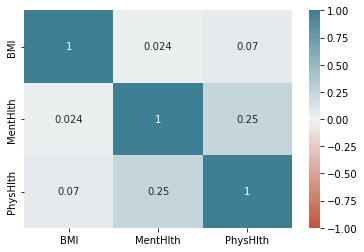

In [43]:
%matplotlib inline
corr = numerical_feature_columns.corr('kendall')
sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, n=200), annot = True)

### Recursive Feature Elimination

In [66]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial')
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(x_values_ss, df['Diabetes_Type'])

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [ True  True False  True False False False False False False False False
 False  True False False False False  True False False]
Feature Ranking: [ 1  1  2  1 14 12  7 15 16 17  3 13  6  1  8 10  9  5  1 11  4]


#### Darstellung der Ergebnisse

In [49]:
sel_features_rfe = list(fit.support_)
features = list(x_values.columns)
i = 0

for i in range(len(features)):
    print(str(features[i] + ': ' + str(sel_features_rfe[i])))
    i += 1

HighBP: True
HighChol: True
CholCheck: False
BMI: True
Smoker: False
Stroke: False
HeartDiseaseorAttack: False
PhysActivity: False
Fruits: False
Veggies: False
HvyAlcoholConsump: False
AnyHealthcare: False
NoDocbcCost: False
GenHlth: True
MentHlth: False
PhysHlth: False
DiffWalk: False
Sex_male: False
Age: True
Education: False
Income: False


### Recursive Feature Elimination with Cross Validation

In [73]:
def rec_feat_el_cv(estimator, x_values):
    estimator = estimator
    min_features_to_select = 1
    rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(5), min_features_to_select=min_features_to_select)
    rfecv.fit(x_values,df['Diabetes_Type'])
    print(str(estimator))
    print('Optimal number of features:', rfecv.n_features_)

In [75]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

for model in models:
    rec_feat_el_cv(estimator=model, x_values = x_values_ss)

LogisticRegression()
Optimal number of features: 19
DecisionTreeClassifier()
Optimal number of features: 1
RandomForestClassifier()
Optimal number of features: 1


### Feature Importance 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(x_values_mm,y_values)

sel_features_etc = list(model.feature_importances_)

for i in range(len(features)):
    print(str(features[i] + ': ' + str(sel_features_etc[i])))
    i += 1

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=list(df_features))
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 important features in data")
plt.show()

# Modelling

## Vorbereitung Modelling

## verschiedene Modelle mit Parametern initialisieren

In [ ]:
model_params = {
    'logistic_regression': {
        'model': LogisticRegression(multiclass = 'multinomial'),
        'params': {
            'penalty' = ['l2', None] 
            'solver' = ['newton-cg', 'sag', 'saga', 'lbfgs']
        }
    'random_forrest': RandomForrest()
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cvStratifiedKFoldFoldtifiedKFold(5))
    clf.fit(x_values_ss,df['Diabetes_Type'])
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Evaluation

### Classification Report

In [ ]:
target_names = ['Healthy', 'Prediabetes', 'Diabetes']

print(classification_report(y_test_tts, clf_dtc.predict(x_test_tts), target_names = target_names))

### f1 Score

In [ ]:
# SVC
# print(f1_score(y_test_tts, clf_svm.predict(x_test_tts), average = None, labels = [0.0,1.0,2.0]))

# Decision Tree Classifier
# print(f1_score(y_test_tts, clf_dtc.predict(x_test_tts), average = None, labels = [0.0,1.0,2.0]))

# Random Forrest Classifier
# print(f1_score(y_test_tts, clf_rfc.predict(x_test_tts), average = None, labels = [0.0,1.0,2.0]))
# after Feature Selection
# print(f1_score(y_test_tts_sel, clf_rfc_sel.predict(x_test_tts_sel), average = None, labels = [0.0,1.0,2.0]))